# Analiza zbioru dot. jakości wina białego
Autorzy:
* Michał Banaszczak, 311175
* Patryk Chojnicki, 307426 

Wymagane cytowanie:  
"P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009."

Projekt zakłada analizę danych dotyczących portugalskiego białego wina "Vinho Verde".
Przez trudności w gromadzeniu danych biznesowych, zbiór ogranicza się do danych chemicznych oraz do oceny jakościowej w skali 0 - 10.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

In [2]:
wine = pd.read_csv('../datasets/winequality-white.csv', sep=';')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Rozkład ocen i wypełnienie danych
Badany zbiór posiada blisko 5000 rekordów oraz 12 różnych cech, z czego ostatnia z nich - jakość - jest wynikową pozostałych.

Quantity of records = 4898
Quantity of attributes = 12
Quantity of missing attribute values = 0


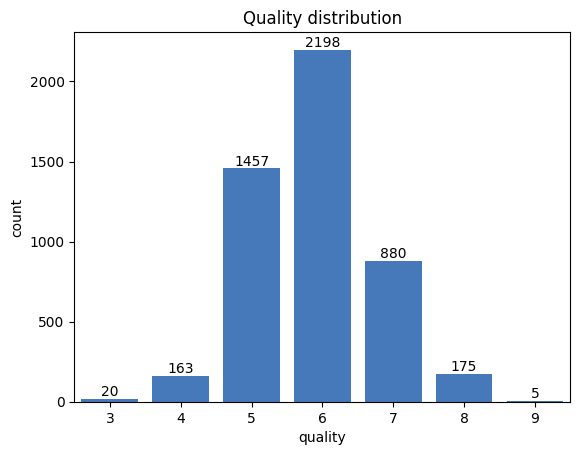

In [3]:
ax = sns.countplot(data=wine, x='quality', color='#37c')
ax.set_title('Quality distribution')
ax.bar_label(ax.containers[0])

print(f'Quantity of records = {wine.shape[0]}')
print(f'Quantity of attributes = {wine.shape[1]}')
# wypełnienie danych:
print(f'Quantity of missing attribute values = {wine.isnull().sum().sum()}')

Obserwujemy, że klasy nie są zbalansowane - występuje zdecydowana przewaga średnich jakościowo win nad definitywnie słabymi czy wybornymi. Rozkład jest zbliżony do Gaussowskiego. Pomimo skali zdefiniowanej jako 0-10, nie ma w zbiorze win ocenionych na *dziesiątkę* ani poniżej *trójki*.

### Analiza zakresów i stopnia zmienności atrybutów

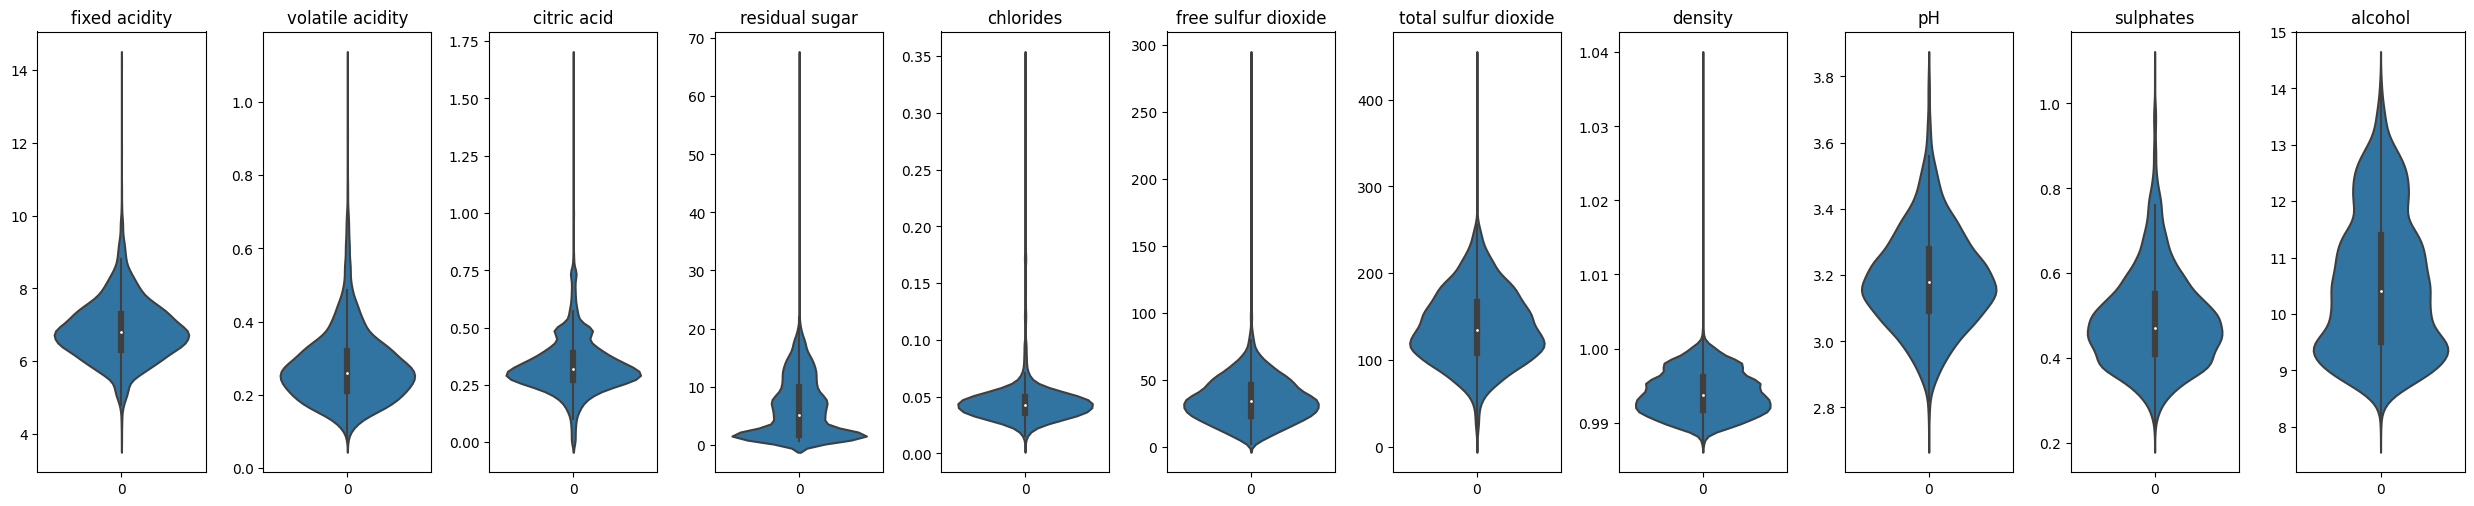

In [4]:
fig, axes = plt.subplots(1, len(wine.columns[:-1]))
fig.set_size_inches(25, 5)
fig.tight_layout()

for ax, attr in zip(axes, wine.columns[:-1]):
	sns.violinplot(wine[attr], ax=ax)
	ax.set_title(attr)

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Atrybuty charakteryzują się znacznie różnymi zakresami - w dalszej analizie, jak i przy tworzeniu modelu, może okazać się potrzebna standaryzacja danych (nie normalizacja min-max, bo zbiór zawiera dużo obserwacji odstających). Wiele cech charakteryzuje się rozkładem prawoskośnym - wyznaczenie logarytmu tych cech powinno wplynąć na jakość modelu.

### Badanie zależności
Z głównego zbioru wyznaczono podzbiory:  
* dolne 25% win
* górne 25% win  

na podstawie jakości. Celem jest znalezienie średnich wartości cech, które znacząco różnią się dla obu tych podzbiorów. Mogłoby to świadczyć o większej wadze tych cech w modelu regresji.

In [6]:
sumtotal = wine.shape[0]
wine_q1 = wine.nsmallest(sumtotal // 4, 'quality')
wine_q4 = wine.nlargest(sumtotal // 4, 'quality')

comparison = pd.DataFrame()
comparison['mean_top'] = wine_q4.describe().loc['mean', :]
comparison['mean_bottom'] = wine_q1.describe().loc['mean', :]
comparison['mean_diff'] = comparison['mean_top'] - comparison['mean_bottom']
comparison['std_total'] = wine.describe().loc['std', :]
comparison['importance'] = np.absolute(comparison['mean_diff'] / comparison['std_total'])
comparison

,mean_top,mean_bottom,mean_diff,std_total,importance
fixed acidity,6.747345,7.064624,-0.317279,0.843868,0.375982
volatile acidity,0.265270,0.311552,-0.046283,0.100795,0.459178
citric acid,0.329314,0.342574,-0.013260,0.121020,0.109567
residual sugar,5.437377,7.001144,-1.563766,5.072058,0.308310
chlorides,0.040029,0.050723,-0.010694,0.021848,0.489456
free sulfur dioxide,35.061683,34.726716,0.334967,17.007137,0.019696
total sulfur dioxide,128.929739,148.757353,-19.827614,42.498065,0.466553
density,0.992719,0.995309,-0.002590,0.002991,0.866007
pH,3.212859,3.176520,0.036340,0.151001,0.240660
sulphates,0.497843,0.477377,0.020466,0.114126,0.179326


Wychodzi na to, że duże znaczenie przy ocenie wina mogą mieć
* zawartość alkoholu
* gęstość
* zawartość chlorków
* całkowita zawartość dwutlenku siarki
* zawartość kwasów lotnych  

Poniżej zbadano korelacje par cech w całym zbiorze.

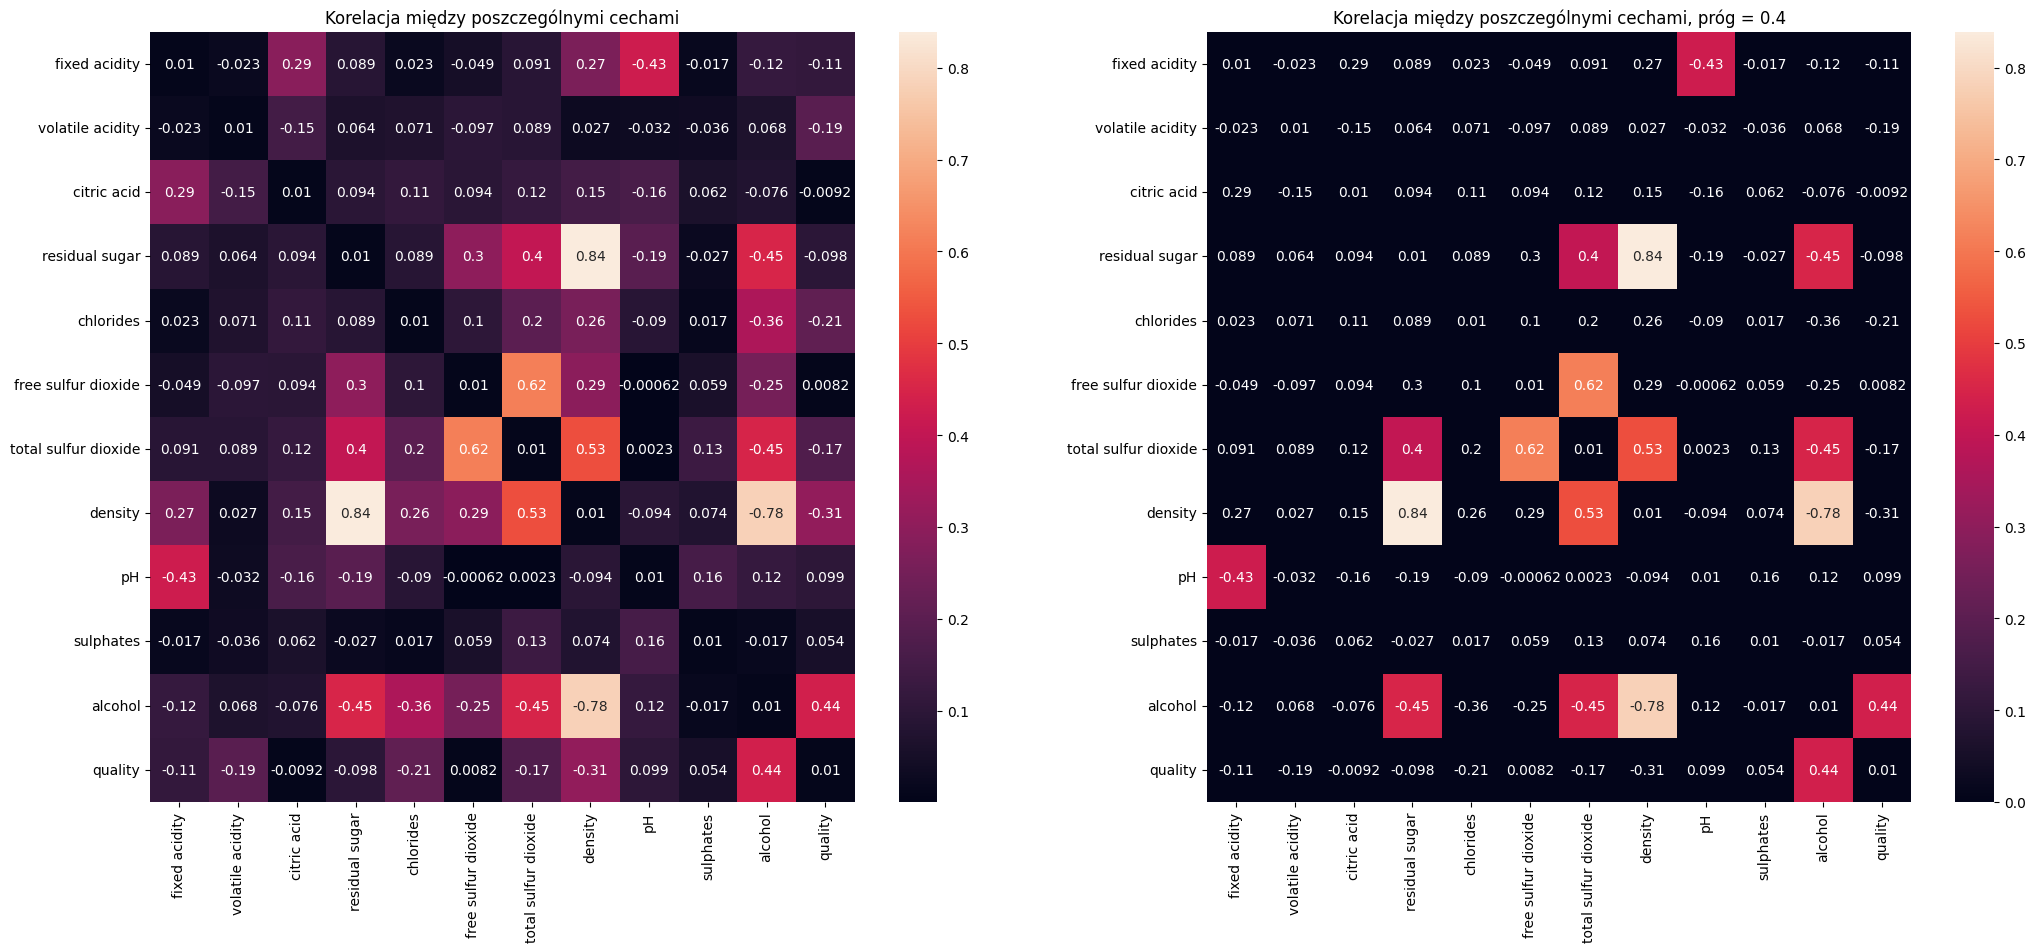

In [7]:
wine_corr = wine.corr()
# diagonalę "zerujemy" tak by zawierała się w zakresie [0.00062, 0.84] dzięki czemu skala kolorów lepiej odwzoruje interesujące nas dane
wine_corr = wine_corr - (np.identity(wine.columns.shape[0]) * 0.99)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(25, 10)
axes[0].set_title('Korelacja między poszczególnymi cechami')
sns.heatmap(abs(wine_corr), annot=wine_corr, ax=axes[0])

threshold = abs(wine_corr) * (abs(wine_corr) >= 0.4)
axes[1].set_title('Korelacja między poszczególnymi cechami, próg = 0.4')
ax = sns.heatmap(threshold, annot=wine_corr, ax=axes[1])

Najwięcej skorelowanych atrybutów (przynajmniej 3) obserwujemy dla cech: *alcohol*, *density*, *total sulfur dioxide* i *residual sugar*. Dodatkowo, są one powiązane przede wszystkim między sobą nawzajem.

Największą korelacją wykazały się *density* względem *residual sugar* oraz *density* względem *alcohol*. Dla gęstości, w zakresie progowania znajduje się także *total sulfur dioxide*. Świadczy to wprost o tym, że skład wina przekłada się na jego gęstość, co jest zgodne z intuicją. Widzimy też, że jedynym atrybutem o znaczącej ujemnej korelacji jest alkohol, co wskazuje na jego mniejszą gęstość względem pozostałych składników. Można by zatem w uproszczeniu przyjąć *density* jako uogólnienie pozostałych cech, równoważące się z *alcohol*.

Analizując korelacje alkoholu, obserwujemy przeważającą tendencję do spadku pozostałych atrybutów przy jego wzroście. Sugeruje to, że duża ilość alkoholu w winie zniweluje wpływ pozostałych jego cech. Co ciekawe, alkohol jest też jedynyną cechą w znaczący sposób skorelowaną z jakością, w dodatku pozytywnie. Zatem **powinna pojawić się ogólna tendencja do wzrostu jakości wina wraz z ilością zawartego w nim alkoholu**, co przyjmujemy za pierwszą część tezy badawczej do następnego etapu projektu.

Przy jakości pozostając, duża większość atrybutów ma na nią raczej delikatny wpływ, choć przeważnie negatywny. Wyjątek stanową wspomniany wcześniej *alcohol*, w pomijalnym stopniu *free sulfur dioxide* oraz poniekąd znaczący *pH*. Umacnia to hipotezę, że najlepszym sposobem na zwiększenie jakości wina będzie zwiększenie w nim stężenia alkoholu. Z negatywnych korelacji najsilniejsze są *density*, *chlorides* oraz *volatile acidity*, z czego to ostatnie jest bardzo słabo powiązane zarówno z gęstością jak i alkoholem, stąd warto mieć ten atrybut na szczególnej uwadze chcąc wykorzystać te dwa najbardziej znaczące. Za drugą część hipotezy badawczej więc przyjmujemy **możliwość wyłączenia z modelu paru cech znacząco skorelowanych z gęstością, ta bowiem jest negatywnie skorelowana z jakością**.

Trzecią częścią hipotezy będzie **przyjrzenie się wpływowi cechy *volatile acidity* na jakość**, gdyż ta nie jest znacząco skorelowana z pozostałymi cechami, a zdaje się mieć lekką korelację z jakością - aczkolwiek dalej poniżej progu. 

### Wizualizacja
Poniżej znajduje się wizualizacja korelacji wszystkich par atrybutów, dla których wsp, korelacji przekroczył ustalony wcześniej próg. Dla punktów danych pokazana jest również odpowiadająca jakość poszczególnych win.

In [8]:
high_corr_pairs = []
collen = len(wine.columns)

for i in range(collen):
	for j in range(i + 1, collen):
		if abs(corr := wine_corr.iloc[i, j]) >= 0.4:
			attr_pair = (wine_corr.columns[i], wine_corr.index[j], corr)
			high_corr_pairs.append(attr_pair)

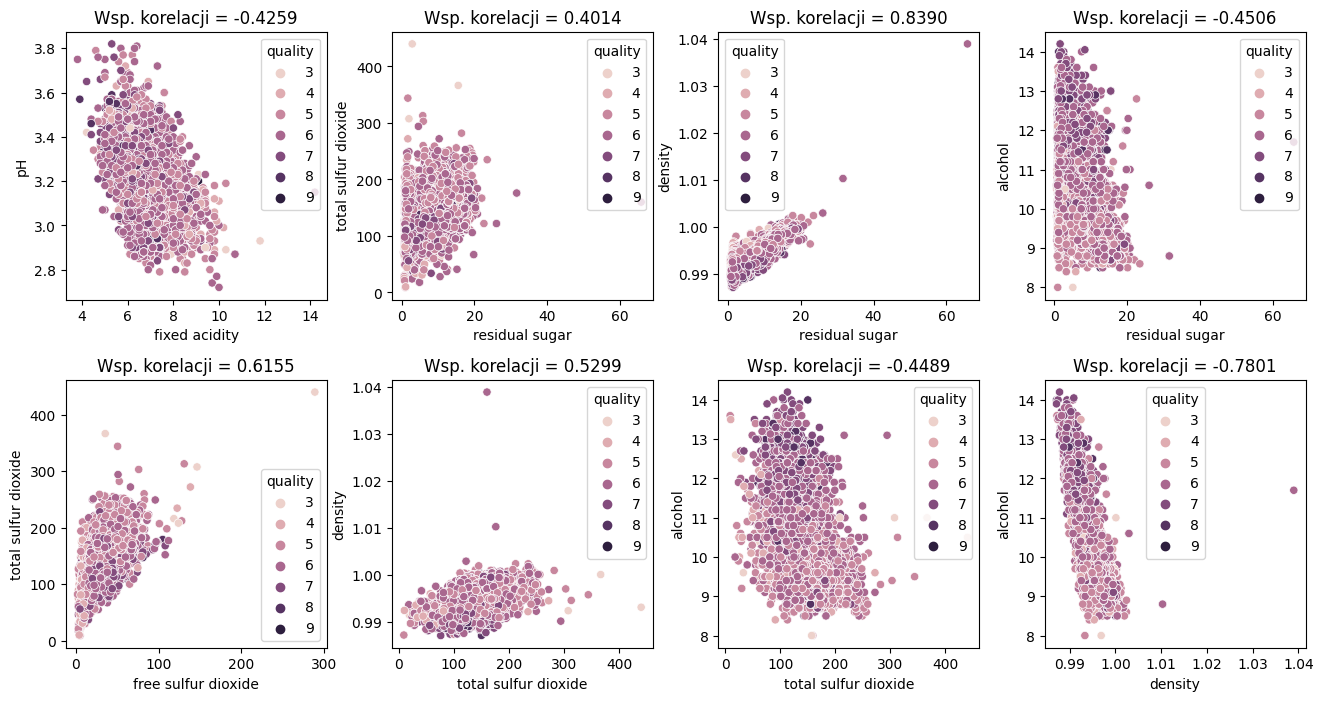

In [9]:
fig, axes = plt.subplots(2, len(high_corr_pairs) // 2)
fig.set_size_inches(16, 8)
fig.subplots_adjust(hspace=0.3, wspace=0.25)

for ax, pair in zip(axes.flatten(), high_corr_pairs):
	sns.scatterplot(data=wine, x=pair[0], y=pair[1], ax=ax, hue='quality')
	ax.set_title(f'Wsp. korelacji = {pair[2]:2.4f}')

Wizualizacja danych, których korelacje zostały przedstawione wyżej na heatmapie. Diagonala zawiera wykresy gęstości rozkładu danej cechy z podziałem na wynikową jakość. Pod diagonalą znajdują się wykresy punktowe par cech przedstawiające rozmieszczenie poszczególnych win dla zadanej pary. Kolory kategorii takie same jak w rycinie powyżej. Nad diagonalą zostały umieszczone dwuwymiarowe histogramy pokazujące gęstość rozmieszczenia obiektów na płaszczyznach par cech.

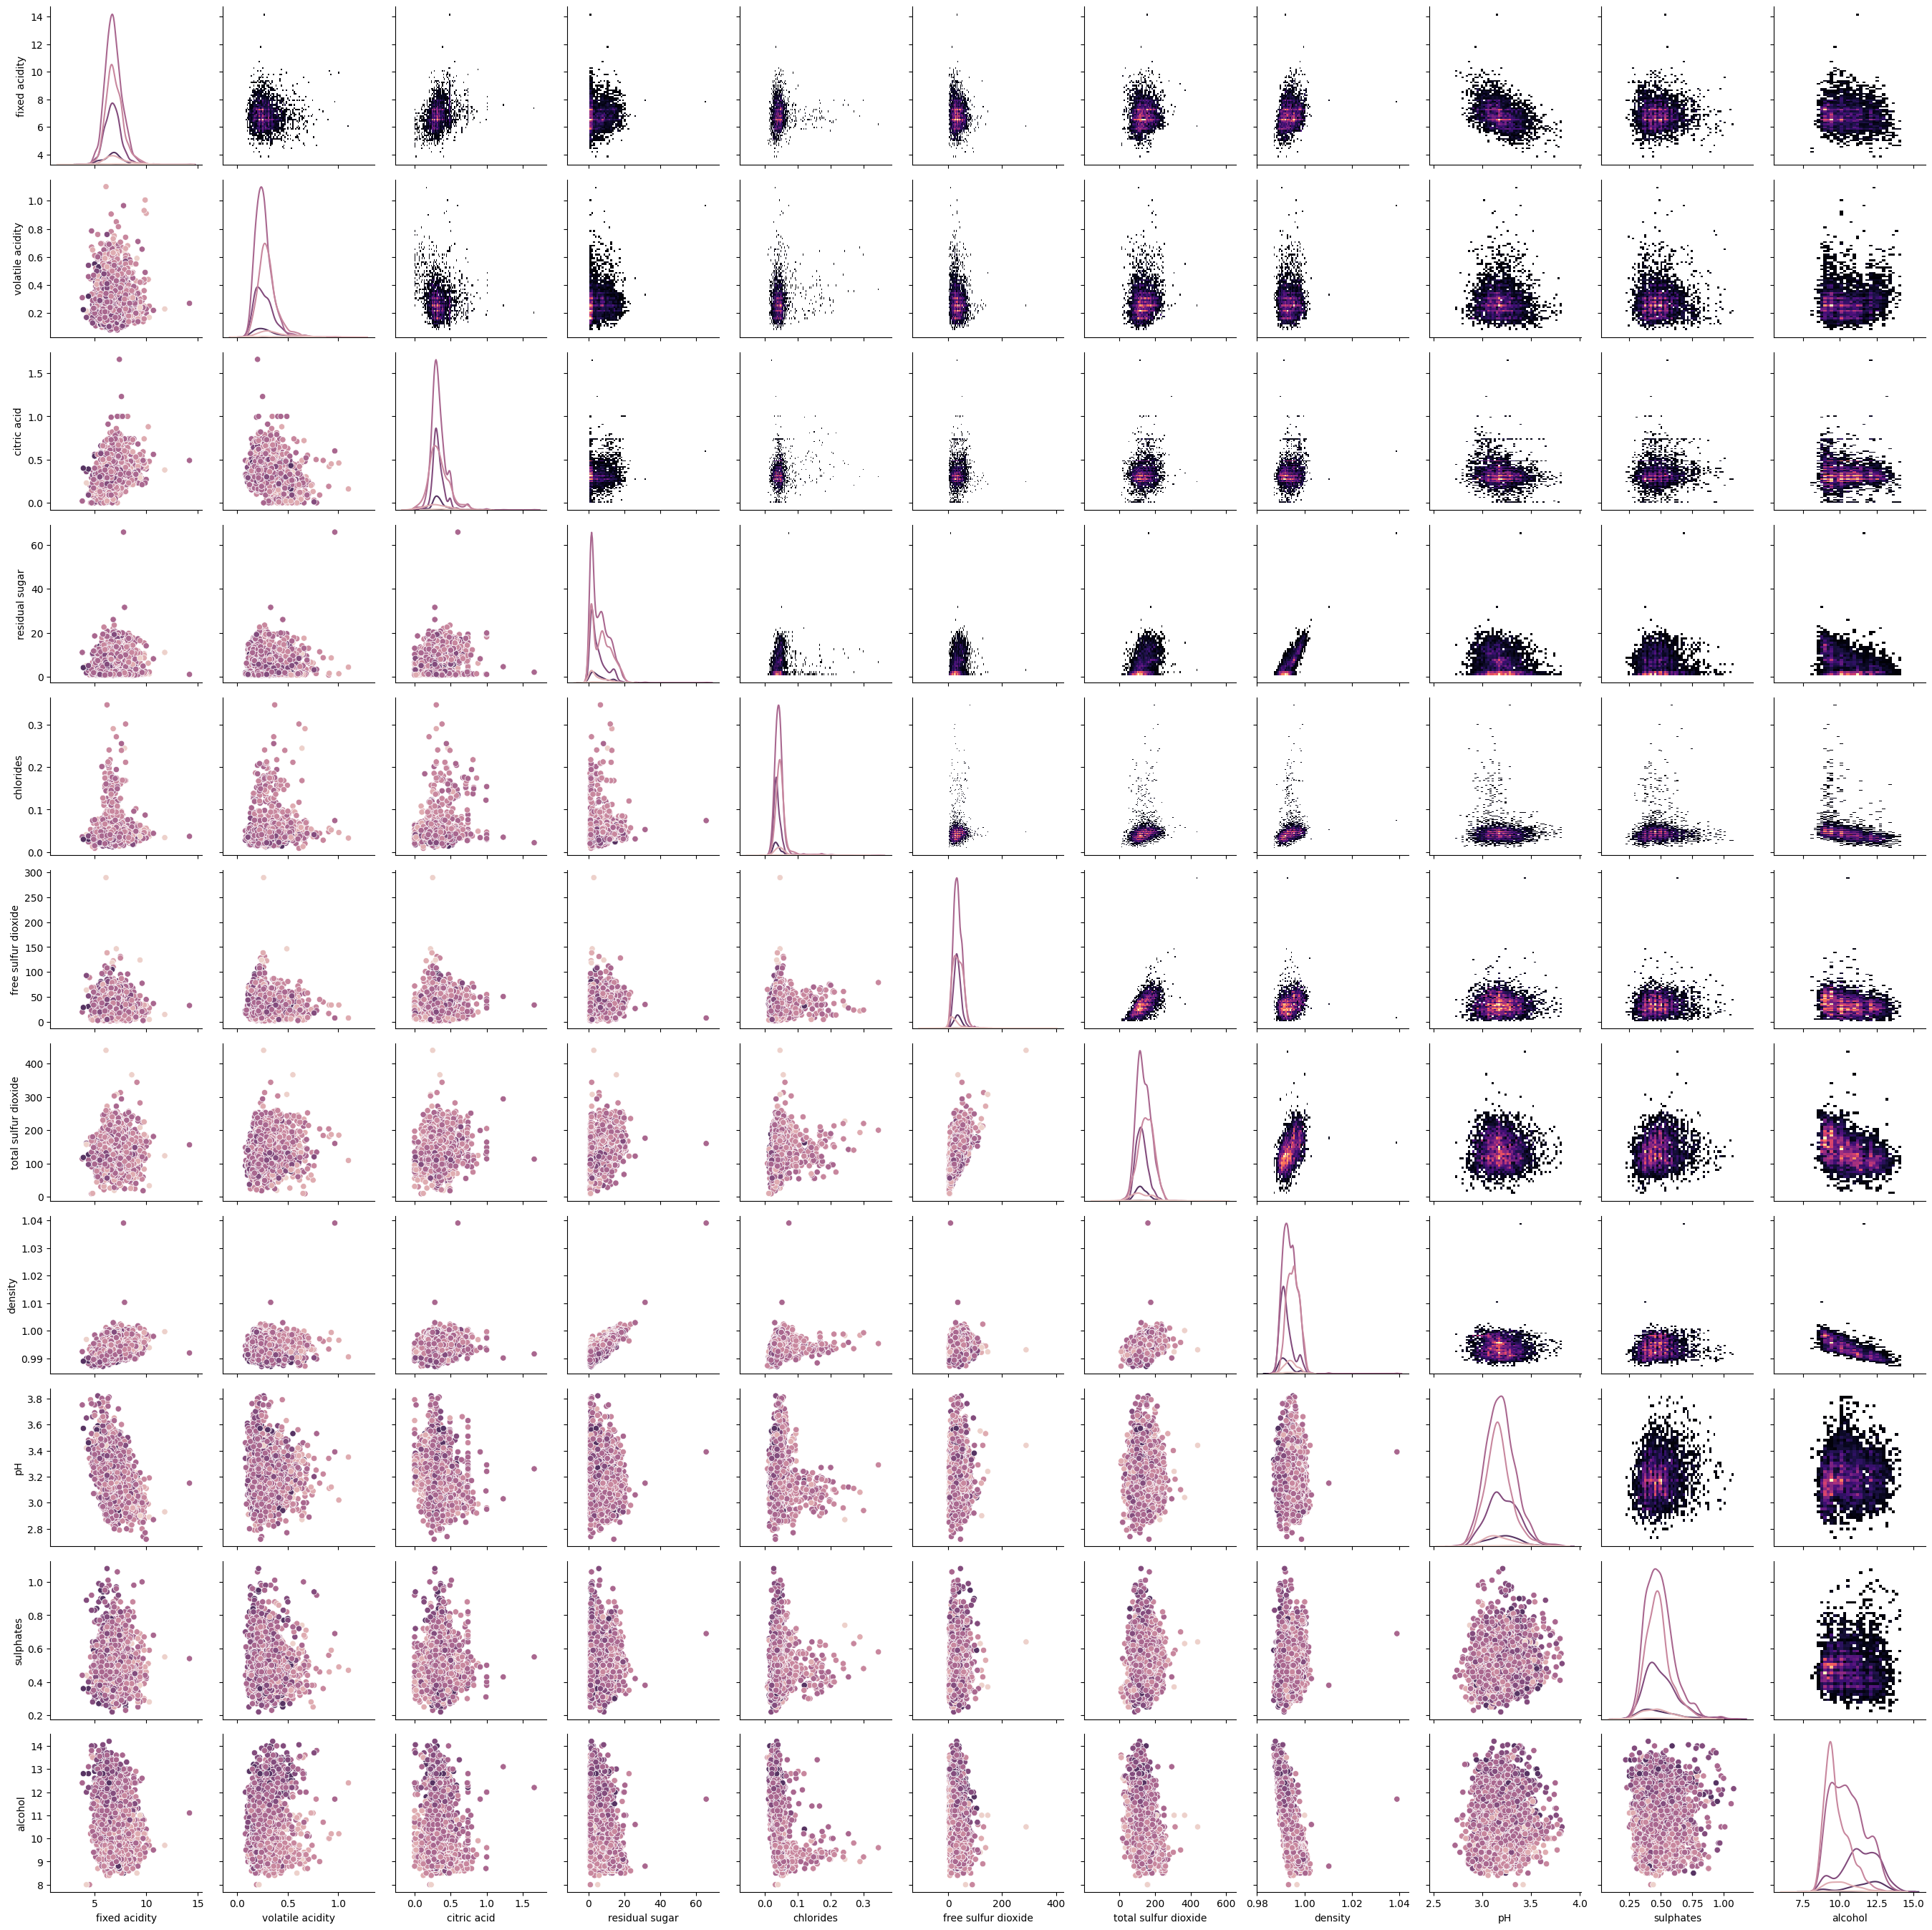

In [10]:
g = sns.PairGrid(wine.drop('quality', axis=1), diag_sharey=False, corner=False)
g.map_lower(sns.scatterplot, hue=wine['quality'])
g.map_diag(sns.kdeplot, hue=wine['quality'])
g.map_upper(sns.histplot, cmap='magma')

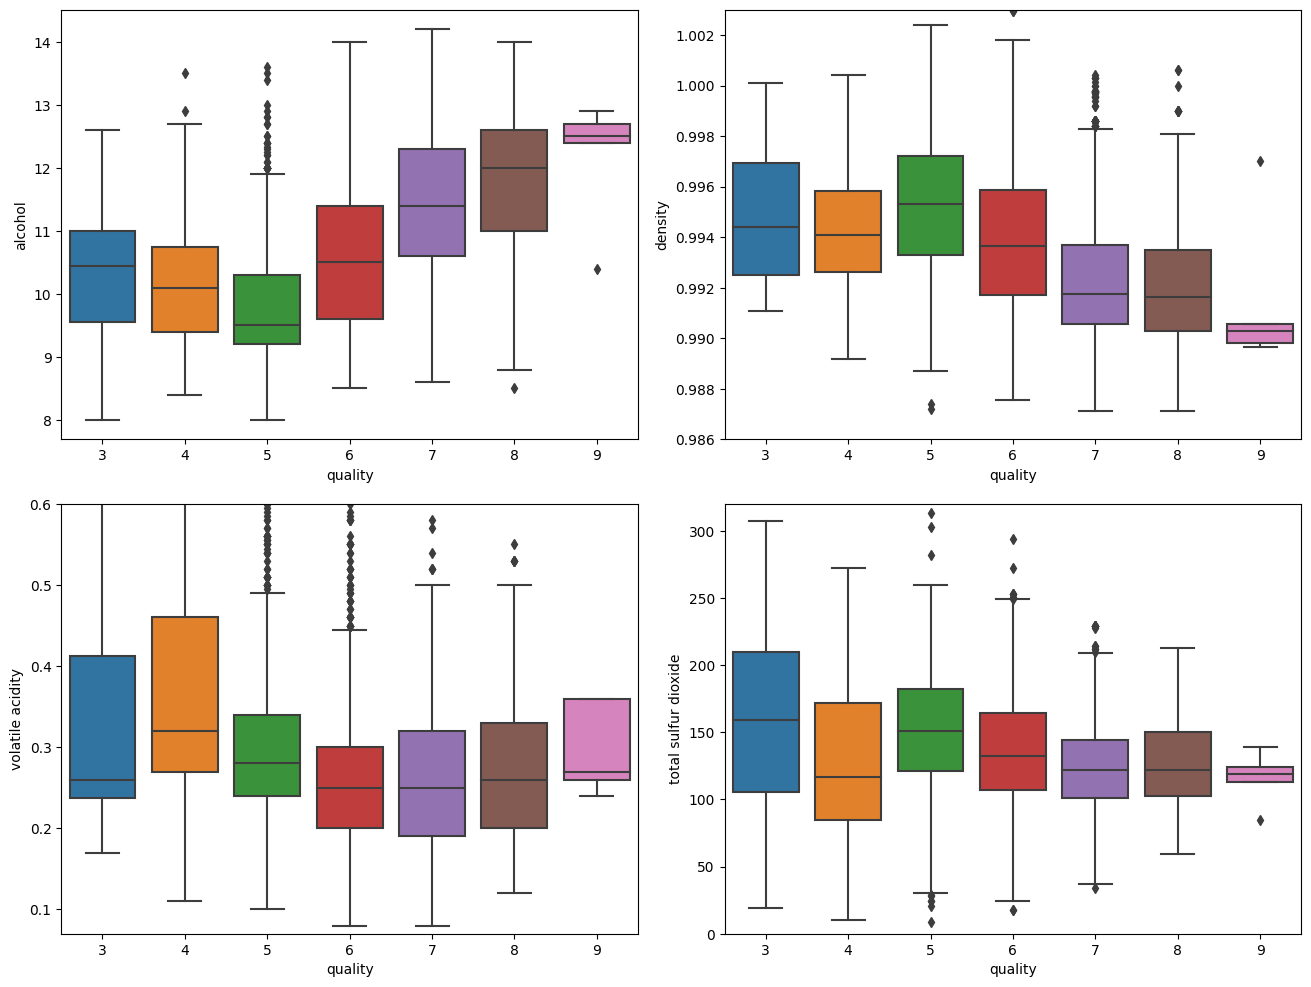

In [11]:
attrs = ('alcohol', 'density',      'volatile acidity', 'total sulfur dioxide')
lims =  (None,      (0.986, 1.003), (0.07, 0.6),        (0, 320))

fig, axes = plt.subplots(2, len(attrs) // 2)
fig.set_size_inches(16, 12)
fig.subplots_adjust(hspace=0.15, wspace=0.15)

for ax, attr, lim in zip(axes.flatten(), attrs, lims):
	sns.boxplot(data=wine, x='quality', y=attr, ax=ax)
	ax.set(ylim=lim)

### Hipoteza badawcza
Na podstawie analizy zbioru danych wysnuwamy poniższe hipotezy do udowodnienia w nastepnym etapie projektu:
* pozytywny wpływ zawartości alkoholu na jakość wina (jako jedyny ma pozytywną korelację z jakością) oraz możliwość wyłaczenia z modelu paru cech z nim skorelowanych
* negatywny wpływ lotnej kwasowości wina na jego jakość, zwłaszcza przy braku wyraźnej korelacji tej cechy z innymi
* negatywny wpływ gęstości na jakość - mimo chemicznego związku z zawartością alkoholu cecha ta jest skorelowana z paroma innymi cechami, które spróbujemy wyłaczyć z modelu na rzecz gęstości   

Przydział liczby całkowitej jako oceny jakości wygląda jak problem klasyfikacyjny, natomiast wychodzimy z założenia, że *słaba szóstka to nie to samo co mocna szóstka*. Z tego powodu w naszym modelu ocenę jakości potraktujemy jako liczbę rzeczywistą z zakresu [0;10], przez co zastosowanie regresji będzie miało dużo lepsze uzasadnienie.  
Takie podejście może jednak wymagać zaokrąglania wyników estymatora, by umożliwić testowanie wynikowych predykcji. Może zajść również potrzeba zastosowania specjalnej funkcji kosztu takiej, by wartości zwracane przez model nie wychodziły poza zdefiniowany zakres.